# **Prologue**

## Overview Final Project dan Expected Output

# **Introducing Libraries and Datasets**

## Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split




# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score




### Loading The Data

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

### About The Dataset

#### Overview of the attributes:




*   `hotel` : Hotel (H1 = Resort Hotel or H2 = City Hotel)
*   `is_canceled` : Value indicating if the booking was canceled (1) or not (0)
*   `lead_time` : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
*   `arrival_date_year` : Year of arrival date
*   `arrival_date_month` : Month of arrival date
*   `arrival_date_week_number` : Week number of year for arrival date
*   `arrival_date_day_of_month : Day of arrival date` :
*   `stays_in_weekend_nights` :  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   `stays_in_week_nights` :  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   `adults` :  Number of adults
*   `children` :  Number of children
*   `babies ` :  Number of babies
*   `meal` : Type of meal booked. Categories are presented in standard hospitality meal packages:
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)

*   `country ` : Country of origin. Categories are represented in the ISO 3155–3:2013 format
*   `market_segment` : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   `distribution_channel` : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
*   `is_repeated_guest` : Value indicating if the booking name was from a repeated guest (1) or not (0)
*   `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking
*   `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking
*   `reserved_room_type` : Code of room type reserved. Code is presented instead of designation for anonymity reasons
*   `assigned_room_type` : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons
*   `booking_changes` : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
*   `deposit_type` : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
No Deposit – no deposit was made;
Non Refund – a deposit was made in the value of the total stay cost;
Refundable – a deposit was made with a value under the total cost of stay.

*   `agent` : ID of the travel agency that made the booking
*   `company` : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
*   `days_in_waiting_list` : Number of days the booking was in the waiting list before it was confirmed to the customer
*   `customer_type` : Type of booking, assuming one of four categories:
Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking

*   `adr` : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
*   `required_car_parking_spaces` : Number of car parking spaces required by the customer
*   `total_of_special_requests` : Number of special requests made by the customer (e.g. twin bed or high floor)
*   `reservation_status` : Reservation last status, assuming one of three categories:
Canceled – booking was canceled by the customer;
Check-Out – customer has checked in but already departed;
No-Show – customer did not check-in and did inform the hotel of the reason why

*   `reservation_status_date` : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel




In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'bookingID'],
      dtype='object')

#### Treatment : Data Type

In [ ]:
#Mengubah Tipe Data reservation_status_date
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"],dayfirst=True)

# **Data Cleaning**

## Duplicate Data

In [ ]:
print(df.duplicated().sum())
print(df.duplicated().sum()*100/len(df),'%')

0
0.0 %


In [ ]:
# Memeriksa duplikat berdasarkan kolom 'bookingID'
duplicate_rows = df[df.duplicated(subset=['bookingID'])]

# Menampilkan data duplikat
print("Data Duplikat:")
print(duplicate_rows)

Data Duplikat:
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, bookingID]
Index: []

[0 rows x 33 columns]


**Observation:** cek dari idbooking tidak di temukan data duplikat

## Missing Value

In [ ]:
#Mengecek Adanya Missing Value
missing = pd.DataFrame({"Missing Value" : df.isnull().sum(), "% Missing Value" : df.isnull().sum()/len(df)*100})
missing[missing["Missing Value"]>0]

,Missing Value,% Missing Value
children,3,0.003602
country,346,0.415401
agent,11404,13.691427
company,78559,94.316449


**Observation** :
- `Children` dan `Country` memiliki missing value yang kurang dari 1%.
- `Children` hanya memiliki missing value yang minim, diasumsikan tidak memiliki anak.
- Karena terliat dibeberapa kolom ada data yang diisi dengan undefined, maka missing value pada `Country` akan diisi oleh undefined juga.
- Karena persentase missing value pada `Company` sangat besar, sehingga kolom akan di drop.
- Karena `agent` cukup banyak, data tersebut akan diisi dengan nilai lain.

In [ ]:
#Mengecek Modus dari country
df["country"].mode()

0    PRT
Name: country, dtype: object

Observation:
1. Terdapat 4 kolom yang memiliki missing value yang harus dihandle dengan cara sebagai berikut:

      *  Kolom children : diisi dengan 0 karena diasumsikan tidak ada children yang stay pada bookingan tersebut

      *  Kolom country : diisi dengan Portugal karena merupakan modus dari country. Selain itu, secara best practice, kolom country seringkali kosong apabila negara asal guest adalah negara dimana hotel berada
      
      *  Kolom agent : diisi dengan 0 karena tidak semua bookingan berasal dari agent (bisa saja berasal dari group, direct, etc), sehingga kolom agent menjadi kosong

      * Kolom company : drop column karena lebih dari 90% kolom company kosong

### **Handling Missing Value**

#### **Treatment for Missing Values in Company Column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           83293 non-null  object        
 1   is_canceled                     83293 non-null  int64         
 2   lead_time                       83293 non-null  int64         
 3   arrival_date_year               83293 non-null  int64         
 4   arrival_date_month              83293 non-null  object        
 5   arrival_date_week_number        83293 non-null  int64         
 6   arrival_date_day_of_month       83293 non-null  int64         
 7   stays_in_weekend_nights         83293 non-null  int64         
 8   stays_in_week_nights            83293 non-null  int64         
 9   adults                          83293 non-null  int64         
 10  children                        83290 non-null  float64       
 11  ba

In [ ]:
#menghapus kolom company
df.drop(columns="company",inplace=True)

Karena data 'company' hanya sedikit

#### **Treatment for Missing Values in Adult Children Babies Column**

In [ ]:
#Mengisi NaN menjadi 0 (diasumsikan tidak memiliki anak)
df["children"]=df["children"].fillna(0)

In [ ]:
#Merubah tipe data dari float menjadi int karena manusia pasti berjumlah sebanyak bilangan bulat

df['children'] = df['children'].astype(int)

In [ ]:
df[((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1377,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,37,2018,November,47,17,1,3,0,...,No Deposit,9,0,Transient,97.40,1,1,Check-Out,2018-11-21,1378
1726,Protea Hotel by Marriott Cape Town Sea Point C...,0,31,2018,December,53,27,2,8,0,...,No Deposit,87,0,Transient,28.00,1,0,Check-Out,2019-01-06,1727
1991,Sheraton Mexico City Maria Isabel Hotel Mexico...,0,0,2019,February,9,27,0,0,0,...,No Deposit,85,0,Transient,0.00,0,0,Check-Out,2019-02-27,1992
2036,Baton Rouge Acadian Centre/LSU Area Courtyard ...,0,0,2017,August,33,10,9,20,0,...,No Deposit,87,0,Transient,0.00,0,0,Check-Out,2017-09-08,2037
2401,"Orlando Airport Courtyard Orlando, FL",0,0,2017,December,52,24,0,0,0,...,No Deposit,28,0,Transient,0.00,0,1,Check-Out,2017-12-24,2402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80658,Courtyard by Marriott Toulouse Airport Toulous...,1,1,2017,September,37,6,2,0,0,...,No Deposit,1,0,Transient-Party,0.00,0,0,Canceled,2017-09-05,80659
81486,Courtyard by Marriott Toulouse Airport Toulous...,1,0,2019,August,32,11,0,0,0,...,No Deposit,87,0,Transient,0.00,0,0,Canceled,2019-08-11,81487
82012,Protea Hotel Fire & Ice! by Marriott Cape Town...,1,173,2018,April,15,8,2,3,0,...,No Deposit,21,0,Transient-Party,0.00,0,0,Canceled,2018-03-29,82013
82681,"Tamarind, Barbados Barbados",0,177,2018,December,53,30,2,5,0,...,No Deposit,87,0,Transient,1.29,0,2,Check-Out,2019-01-06,82682


**observation:** Terdapat 127 rows adults, children dan babies yang bernilai 0 bersamaan.

Karena dalam proses pemesanan hotel tidak mungkin terjadi jumlah tamu sama dengan nol dari fitur `adults` , `children` dan `babies`. jika terdapat jumlah tamu sama dengan nol maka ada di drop data tersebut,

In [ ]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

 Perlu ada minimal 1 orang yang menginap agar data valid. Selain itu, bayi pun tidak akan menginap sendiri tanpa orang tua atau kakaknya. Jadi akan dihilangkan jika ada data yang jumlah `adult` dan `children` adalah 0.

#### **Treatment for Missing Values in Country Column**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,No Deposit,314.0,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,Non Refund,1.0,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,Non Refund,12.0,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,No Deposit,NaN,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,No Deposit,16.0,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
#Mengisi data NaN menjadi Undefined
df["country"]=df["country"].fillna("Undefined")

In [ ]:
print(df["country"])

0              ITA
1              PRT
2              PRT
3        Undefined
4              PRT
           ...    
83288          FRA
83289          CHE
83290          IRL
83291          DEU
83292          CHE
Name: country, Length: 83166, dtype: object


#### **Treatment for Missing Values in Agent Column**

<Axes: xlabel='agent'>

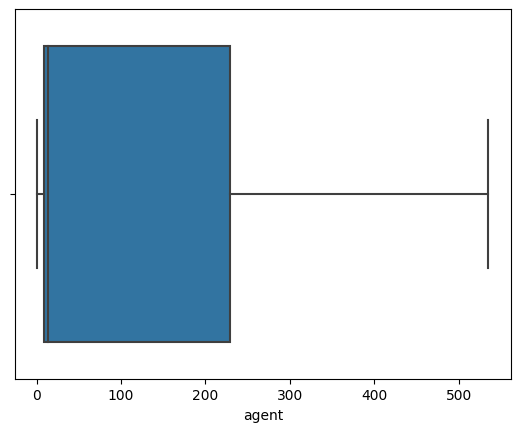

In [ ]:
#cek outlier
sns.boxplot(x=df["agent"],data=df)

Karena tidak ada outlier, maka missing values akan diisi dengan nilai modus

In [ ]:
#Mengisi NaN dengan modus yang dibulatkan (karena agent adalah ID tidak mungkin desimal)

df['agent'] = df['agent'].fillna(df['agent'].mode()[0])

In [ ]:
#Karena agent adalah ID, tidak mungkin desimal
df['agent'] = df['agent'].astype(int)

*Handling Missing Values DONE*

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

#### Missing Values kolom stays

**Jumlah malam menginap**

Sama halnya dengan tamu dalam pemesanan hotel tidak mungkin ada jumlah menginap sama dengan nol. jadi data akan di drop walaupun reservation_status 'check-out'.

In [ ]:
df[((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0))]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
499,"Berlin Marriott Hotel Berlin, Germany",0,25,2018,March,14,30,0,0,1,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2018-03-30,500
627,"The House, Barbados Barbados",0,23,2019,January,2,11,0,0,1,...,No Deposit,9,0,Transient,0.0,0,2,Check-Out,2019-01-11,628
729,Irvine John Wayne Airport/Orange County Courty...,1,29,2018,April,18,30,0,0,2,...,No Deposit,240,0,Transient,0.0,0,1,No-Show,2018-04-30,730
795,Protea Hotel Fire & Ice! by Marriott Johannesb...,0,33,2018,April,16,11,0,0,2,...,No Deposit,171,0,Transient,0.0,0,0,Check-Out,2018-04-11,796
827,"Chicago O'Hare Courtyard Des Plaines, IL",0,0,2018,May,21,17,0,0,1,...,No Deposit,6,0,Transient,0.0,0,0,Check-Out,2018-05-17,828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82256,"Crystal Cove, Barbados Barbados",0,143,2018,April,18,24,0,0,2,...,No Deposit,28,0,Transient,0.0,0,0,Check-Out,2018-04-24,82257
82289,"Berlin Marriott Hotel Berlin, Germany",0,1,2019,May,18,2,0,0,2,...,No Deposit,240,0,Transient,0.0,0,0,Check-Out,2019-05-02,82290
82796,"Waves, Barbados Barbados",0,69,2019,January,1,1,0,0,2,...,No Deposit,5,0,Group,0.0,0,1,Check-Out,2019-01-01,82797
83156,"Orlando Airport Courtyard Orlando, FL",0,0,2019,March,12,20,0,0,1,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2019-03-20,83157


Ternyata ada 445 data yang perlu di drop.

Total Stays > 0
*   Perlu minimal 1 hari untuk menginap agar data tersebut valid. Sehingga data yang jumlah `stays_in_weekend_nights` dan `stays_in_week_nights` nol akan di drop.

In [ ]:
df= df[~((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0))]

## Another Feature

#### ADR >= 0
*   Nilai ADR tidak mungkin negatif, jadi data tersebut akan dihilangkan.
ADR (Average Daily Rate) adalah ukuran rata-rata harga kamar per malam yang diterima oleh hotel atau akomodasi lainnya.


In [ ]:
#Cek apakah kasus tersebut ada?
df[df["adr"]<0.0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID


Ternyata tidak ada adr < 0

### Checking year

In [ ]:
# cek tahun apakah ada tahun kabisat dalam data. Jika ada februarinya hanya sampai tanggal 28.
df_c = df['arrival_date_year'].unique()
print(df_c)

[2019 2018 2017]


**Observation**
- Ternyata tahun hanya ada 2017, 2018 dan 2019. sehingga tidak ada tahun kabisat

### Drop Booking ID

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,No Deposit,314,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,Non Refund,12,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,No Deposit,87,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,No Deposit,16,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
df.drop('bookingID', axis=1, inplace=True)

**Observation**
- Karena bookingID kurang relate dan kurang berguna, sehingga dilakukan drop

### Drop Reservation status

In [ ]:
df.drop('reservation_status', axis=1, inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,A,0,No Deposit,314,0,Transient,38.40,0.0,0.0,2019-01-14
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,A,0,Non Refund,1,0,Transient,62.80,0.0,0.0,2017-10-21
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,A,0,Non Refund,12,0,Transient,110.00,0.0,0.0,2018-11-25
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,A,0,No Deposit,9,0,Transient,45.00,0.0,0.0,2018-10-18
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,A,0,No Deposit,16,0,Transient,57.92,0.0,1.0,2017-08-24


**Observation**
- Karena reservation_status sama dengan is_canceled (target), maka dilakukan drop


# Exploration Data Analysis

## Statistical Summary

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,82561.0,0.371701,0.483262,0.0,0.0,0.0,1.0,1.0
lead_time,82561.0,104.361139,106.935937,0.0,18.0,69.0,161.0,629.0
arrival_date_year,82561.0,2018.157726,0.707090,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_date_week_number,82561.0,27.153147,13.604516,1.0,16.0,27.0,38.0,53.0
arrival_date_day_of_month,82561.0,15.784802,8.777602,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,82561.0,0.934848,1.002169,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,82561.0,2.516467,1.913398,0.0,1.0,2.0,3.0,50.0
adults,82561.0,1.861690,0.597573,1.0,2.0,2.0,2.0,55.0
children,82561.0,0.100229,0.390500,0.0,0.0,0.0,0.0,10.0
babies,82561.0,0.008055,0.100847,0.0,0.0,0.0,0.0,10.0


**Bussiness Insight**
1. Waktu Pemesanan menunjukkan bahwa rata-rata waktu antara pemesanan dan tanggal kedatangan adalah sekitar 104 hari. Ini dapat membantu dalam perencanaan operasional dan kapasitas hotel, perlu adanya antisipasi terkait fasilitas yang ada.
2. Rata-rata pengunjung menginap di weekday 2,5 hari.
3. Rata-rata jumlah orang dewasa yang menginap adalah 1-2 orang dan anak dan bayi per reservasi sangat rendah, yang bisa menjadi pertimbangan dalam perencanaan akomodasi.
4. Ada pengunjung yang seringkali melakukan pembatalan pemesanan sampai 26 kali.
5. Ada pengunjung yang loyal sampai melakukan pemesanan dan tidak membatalkan booking sampai 70 kali.
6. Rata-rata pengunjung tidak masuk ke dalam waiting list mencapai 2.5 hari. Thats not good
7. Rata-rata ADR 103 dan cukup bervariatif. ADR (Average Daily Rate)
8. Rata-rata pengunjung tidak memerlukan parkir mobil. Tetapi tetap ada yang memerlukan. Jadi perlu adanya perhitungan yang efisien untuk menentukan jumlah ruang parkir.

**Observation**
1. Karena `is_canceled` dan `is_repeated_guest` adalah integer, kita perlu mengobservasi kemudian perihal ini.
2. Begitupun dengan `arrival_date_year`, `arrival_date_week_number`, `arrival_date_day_of_month`.
3. Ada pelanggan yang menunggu cukup lama. Perlu dicari tahu penyebabnya.

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
hotel,82561,64,Renaissance New York Times Square Hotel New Yo...,1362
arrival_date_month,82561,12,August,9575
meal,82561,4,BB,64674
country,82561,166,PRT,33465
market_segment,82561,8,Online TA,39068
distribution_channel,82561,5,TA/TO,67861
reserved_room_type,82561,9,A,59646
assigned_room_type,82561,10,A,51506
deposit_type,82561,3,No Deposit,72247
customer_type,82561,4,Transient,61968


## Univariate Analysis

#### Visualisasi Target Variable

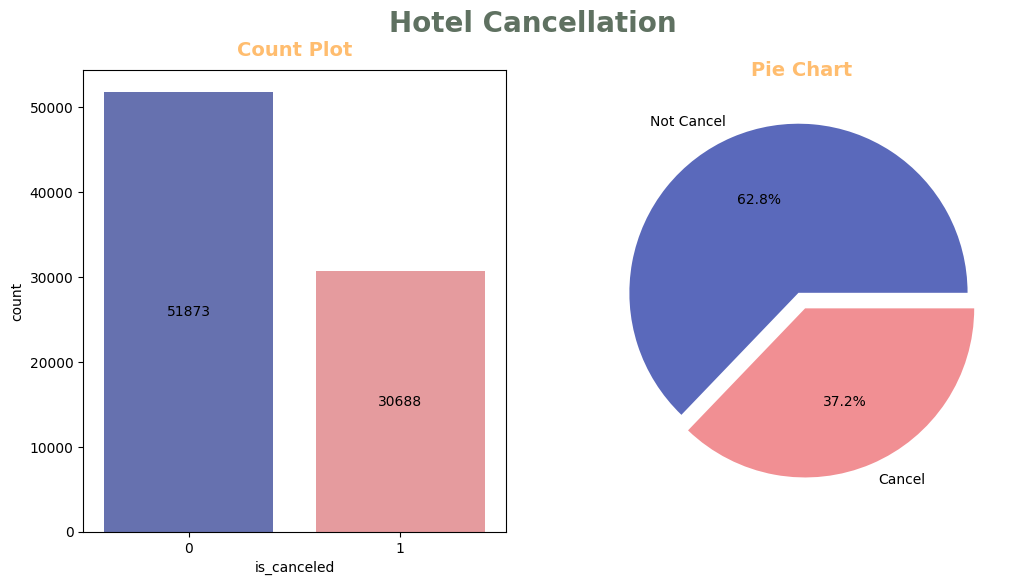

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Membuat Subplot untuk Target Variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Hotel Cancellation", size = 20, color = '#5F7161', weight="bold")
axs = [ax1, ax2]

# Countplot target
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x="is_canceled",data=df, ax=ax1, palette=["#5A69BB","#F18F93"])
ax1.set_title("Count Plot", size = 14, color = '#FFBD6F', weight="bold",pad=10)

# Memberikan keterangan jumlah pada count plot
for p in ax1.patches:
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax1.annotate(round(p.get_height()),(x,y/2), ha='center', va='center')

#Menentukan Attribute Pie Chart
label = ["Not Cancel", "Cancel"]
value = df["is_canceled"].value_counts()
explode = (0.05, 0.05)

#Membuat Pie Chart
ax2.pie(x=value, labels=label, colors=["#5A69BB","#F18F93"],autopct='%1.1f%%', pctdistance=0.6,explode=explode)
ax2.set_title("Pie Chart", size = 14, color = '#FFBD6F', weight="bold",pad=10)

#Mengadjust Subplot
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.78, wspace=0.4, hspace=None);

**Observation**
- Persentase customer yang tidak cancel memang jauh lebih besar dari yang cancel, namun 37,1% yang cancel cukup besar untuk diperhatikan. Mengingat pembatalan booking memberikan pengaruh kepada revenue karena tidak dapat digantikan di kemudian hari. Sehingga diperlukan efektifitas dari proses booking.
- Target imbalance.

#### Visualisasi Categorical & Date Feature

Text(0.5, 1.0, 'Count Plot of Country')

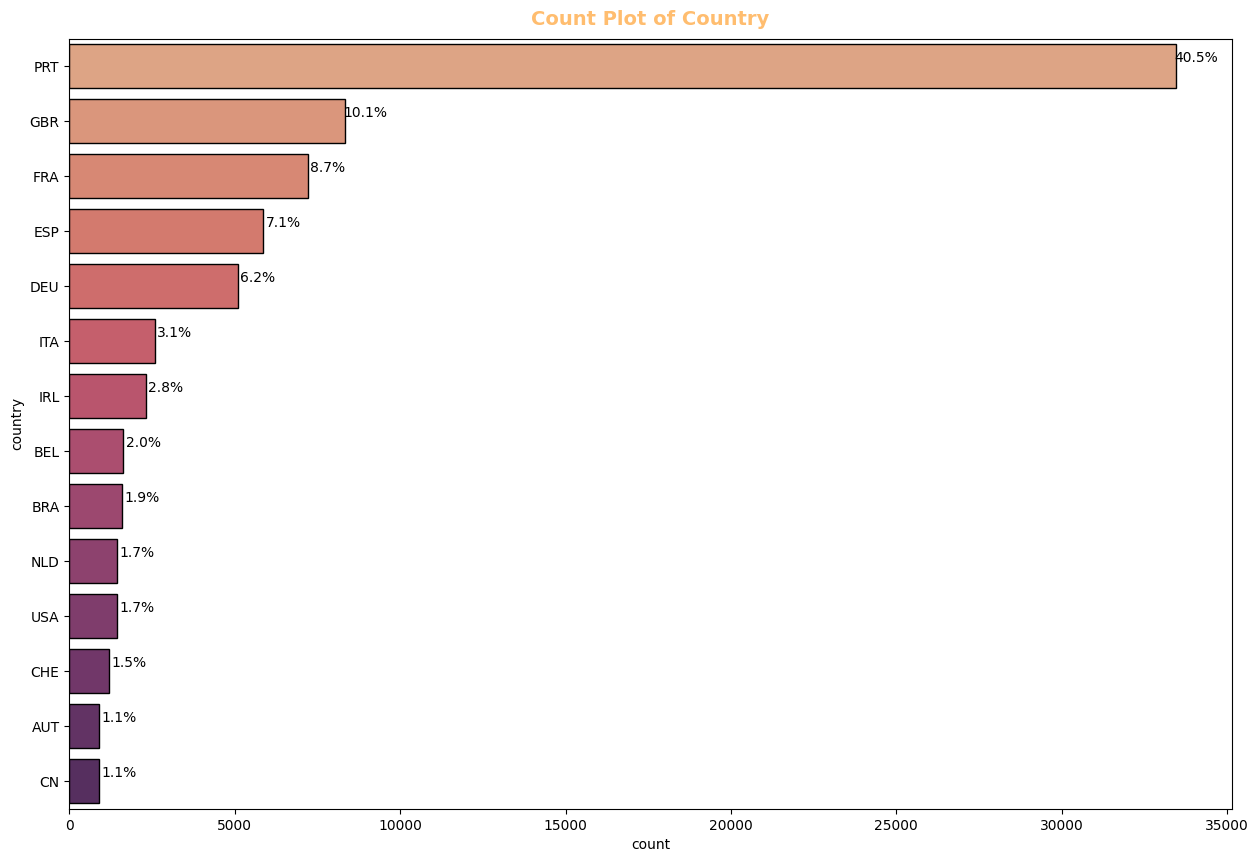

In [ ]:
#Membuat count table untuk country
country = df.groupby(['country']).agg(count = ('country','count')).sort_values('count',ascending=False).reset_index()

#Memvisualisasikan country
plt.figure(figsize=(15,10))
ax = sns.barplot(x=country["count"],y=country["country"][:14],data=country,palette="flare",edgecolor="black")

#Menampilkan jumlah tiap country
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%\n'
    y = p.get_y() +p.get_height() / 2
    x = p.get_width() + 600
    ax.annotate(percentage, (x, y), ha='center', va='center')

#Menampilkan judul
ax.set_title("Count Plot of Country", size = 14, color = '#FFBD6F', weight="bold",pad=10)

Text(0.5, 1.0, 'Count Plot of Agent')

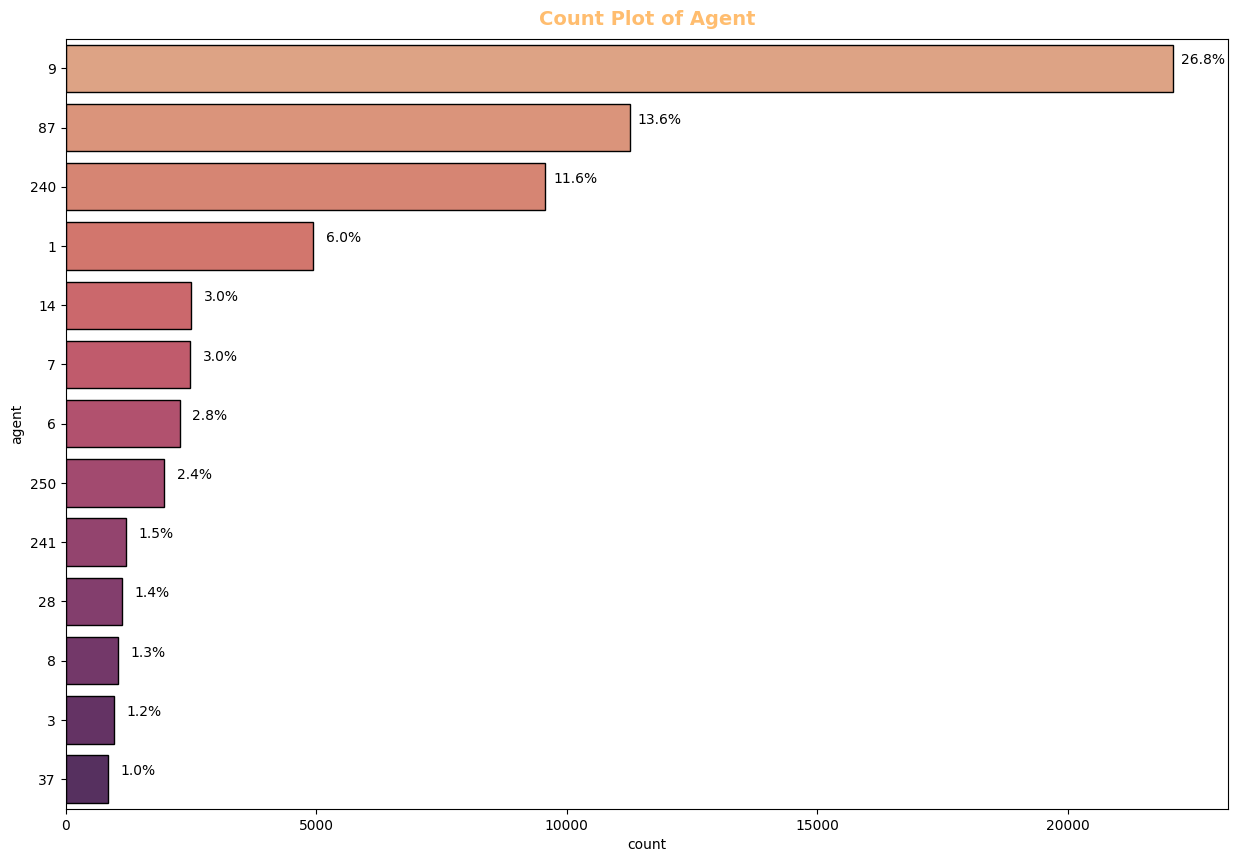

In [ ]:
copy_df = df.copy()
copy_df['agent'] = copy_df['agent'].astype(str)

#Membuat count table untuk country
agent = copy_df.groupby(['agent']).agg(count = ('agent','count')).sort_values('count',ascending=False).reset_index()

#Memvisualisasikan country
plt.figure(figsize=(15,10))
ax = sns.barplot(x=agent["count"],y=agent["agent"][:13],data=agent,palette="flare",edgecolor="black")

#Menampilkan jumlah tiap country
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%\n'
    y = p.get_y() +p.get_height() / 2
    x = p.get_width() + 600
    ax.annotate(percentage, (x, y), ha='center', va='center')

#Menampilkan judul
ax.set_title("Count Plot of Agent", size = 14, color = '#FFBD6F', weight="bold",pad=10)

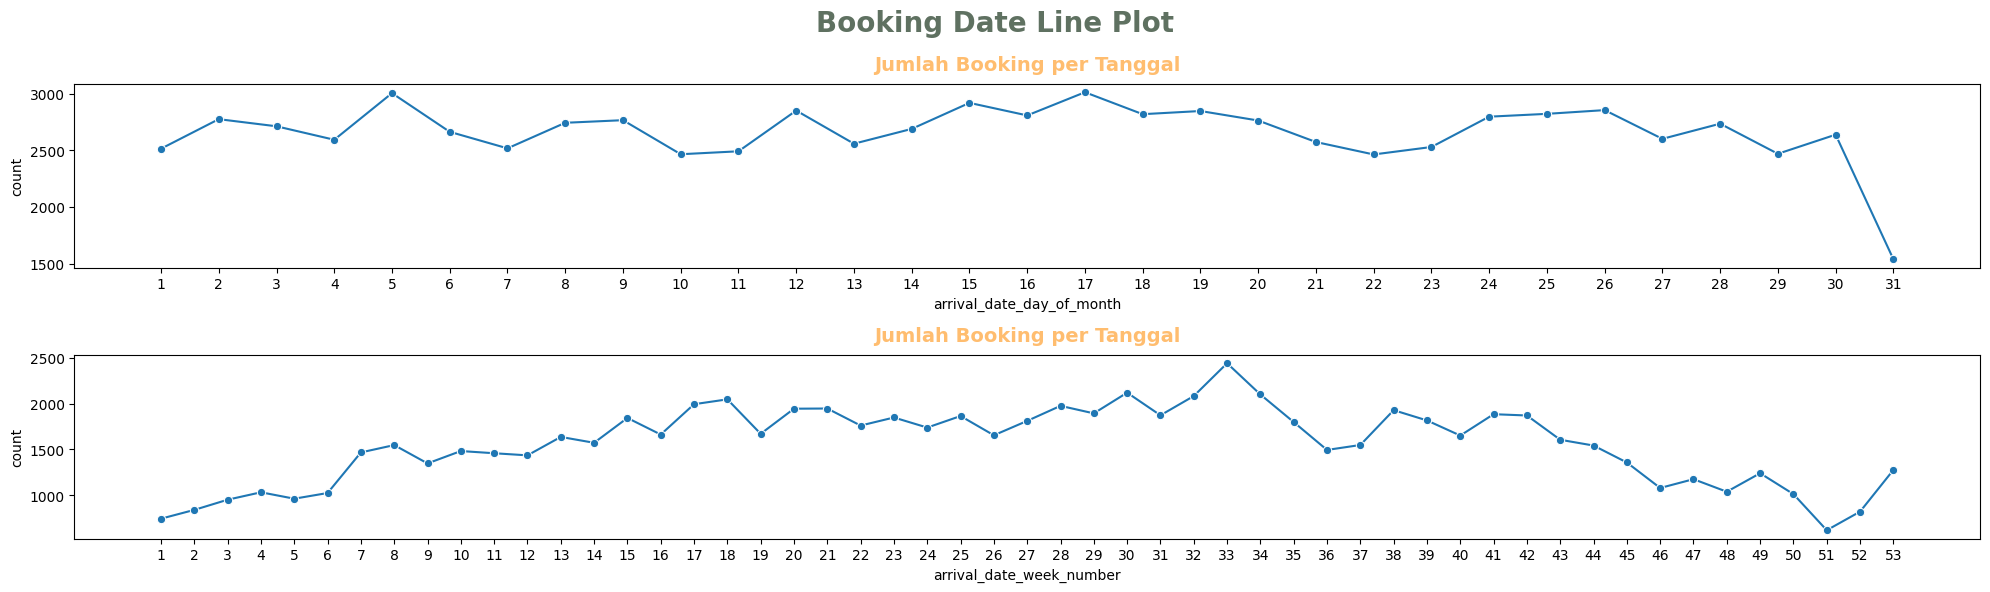

In [ ]:
#Membuat Subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 6))
fig.suptitle("Booking Date Line Plot", size = 20, color = '#5F7161', weight="bold")
axs = [ax1, ax2]

#Membuat count table untuk date
date = df.groupby(['arrival_date_day_of_month']).agg(count = ('arrival_date_day_of_month','count')).reset_index()

#Membuat lineplot untuk date
ax1 = sns.lineplot(data=date, x='arrival_date_day_of_month', y='count', ax=ax1, marker = "o", palette = "#F18F93")
ax1.set_title("Jumlah Booking per Tanggal", size = 14, color = '#FFBD6F', weight="bold",pad=10)
ax1.set_xticks(range(1,32))

#Membuat count table untuk week
week = df.groupby(['arrival_date_week_number']).agg(count = ('arrival_date_week_number','count')).reset_index()

#Membuat lineplot untuk week
ax2 = sns.lineplot(data=week, x='arrival_date_week_number', y='count', ax=ax2, marker = "o", palette = "#F18F93")
ax2.set_title("Jumlah Booking per Tanggal", size = 14, color = '#FFBD6F', weight="bold",pad=10)
ax2.set_xticks(range(1,54))

#Tampilan layout
plt.tight_layout()

**Bussiness Insight**


1. Hampir semua pemesan memilih tipe kamar A. Kemudian disusul tipe D sebanyak 20%. Selebihnya terhitung sangat minim.
2. Terlihat pada tipe kamar A yang dipesan dengan yang diassign menurun tetapi tipe kamar lainnya meningkat. Dimungkinkan adanya overbook pada tipe kamar A.
3. Hampir semua pemesan memilih untuk tidak deposit. Perlu ditinjau apakah hal tersebut merugikan atau tidak.
4. Ternyata sangat sedikit pelanggan yang melakukan repeat book. Perlu adanya langkah supaya keinginan untuk repeat guest dari tiap pelanggan meningkat. Karena repeat guest artinya mereka puas terhadap fasilitas hotel, hal ini juga dapat mendatangkan pelanggan baru.
5. Kedua hotel ini sangat populer di lingkungan warga lokal. Selain itu, banyak negara yang berkunjung juga seperti UK (GBR) yang menempati posisi kedua sebanyak 12% dan Prancis (FRA) ketiga sebanyak 10,2%. Selebihnya hanya kurang dari 10%.
6. Agent dengan ID 9 melakukan booking paling banyak yaitu 33,1%. Disusul oleh ID 240 dan 87. Selebihnya hanya melakukan booking kurang dari 5%.
7. Jumlah booking tiap tanggal hampir rata berkisar 2600 sampai 3000 kecuali tanggal 31 kurang dari 1750. Hal ini wajar karena kemunculan tanggal 31 dalam satu tahun setengahnya dari kemunculan tanggal lainnya.

**Observation**
1. Jika diperhatikan dari fungsi fitur reservation_status dan persentasenya, besar kemungkinan ini duplikat dengan is_canceled.
2. arrival_date_year tidak dapat ditinjau karena data tidak sama rata tiap tahunnya.

### **ADR**

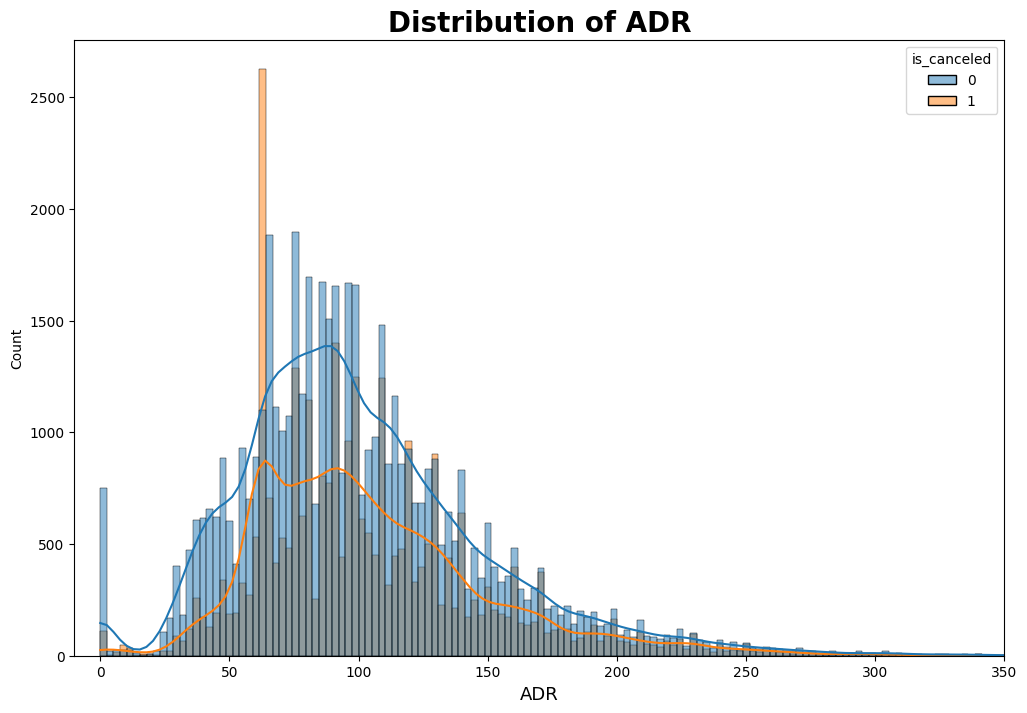

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
             x='adr',
             hue='is_canceled',
             kde=True,
             ax=ax)

ax.set_title('Distribution of ADR', fontsize=20, fontweight='bold')
ax.set_xlabel('ADR', fontsize=13, fontweight='normal')
ax.set_xlim(-10, 350)

plt.show(fig)

Mayoritas tamu mengeluarkan 50-150


### **Repeated guest**
0 : No
<br> 1: Yes

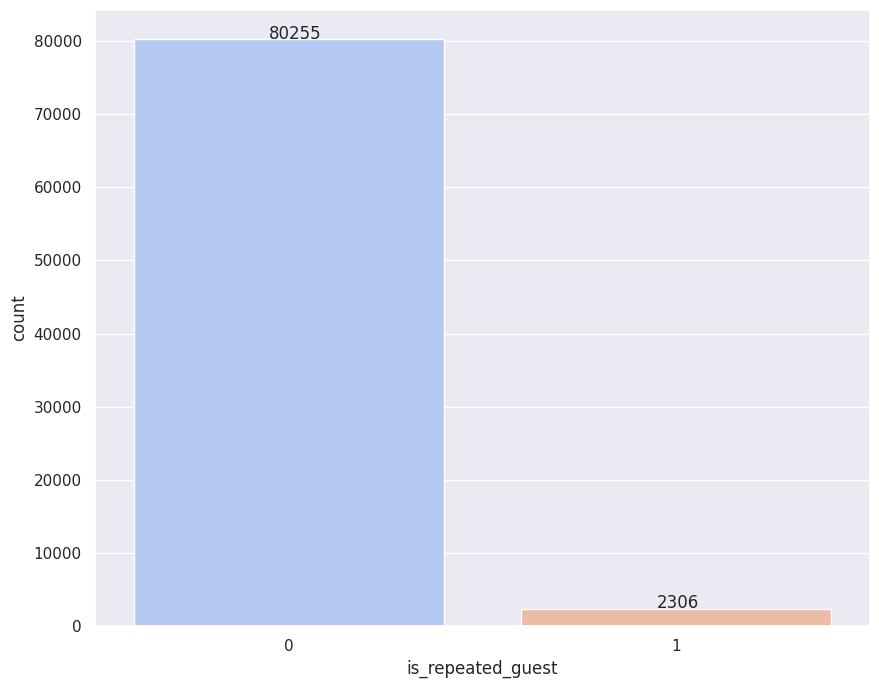

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='is_repeated_guest', data=df, palette='coolwarm')
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.35, patch_height+100))
plt.show()

In [ ]:
df_c = df.groupby(['is_repeated_guest', 'is_canceled']).size().reset_index()
df_c['percentage'] = df.groupby(['is_repeated_guest', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_c.columns = ['is_repeated_guest', 'is_canceled', 'Counts', 'Percentage']

df_c['is_canceled'] = df_c['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')
df_c['is_repeated_guest'] = df_c['is_repeated_guest'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_c, x='is_repeated_guest', y='Counts',
       color='is_canceled',
       width=800,
       height=550,
       color_discrete_map={
        'Yes': '#F9BF59',#94B6D1
        'No': '#94B6D1',
    },
    text=df_c['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

Tamu yang sudah repeat order cenderung tidak cancel

### Visualisasi Numerical Feature

In [ ]:
#Sebelumnya kita telah memiliki list numerical, namun akan di remove beberapa sesuai kebutuhan
new_nums = nums.copy()
new_nums.remove('is_canceled')
new_nums.remove('arrival_date_year')
new_nums.remove('arrival_date_week_number')
new_nums.remove('arrival_date_day_of_month')
new_nums.remove('is_repeated_guest')
new_nums.remove('agent')

In [ ]:
new_nums

['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

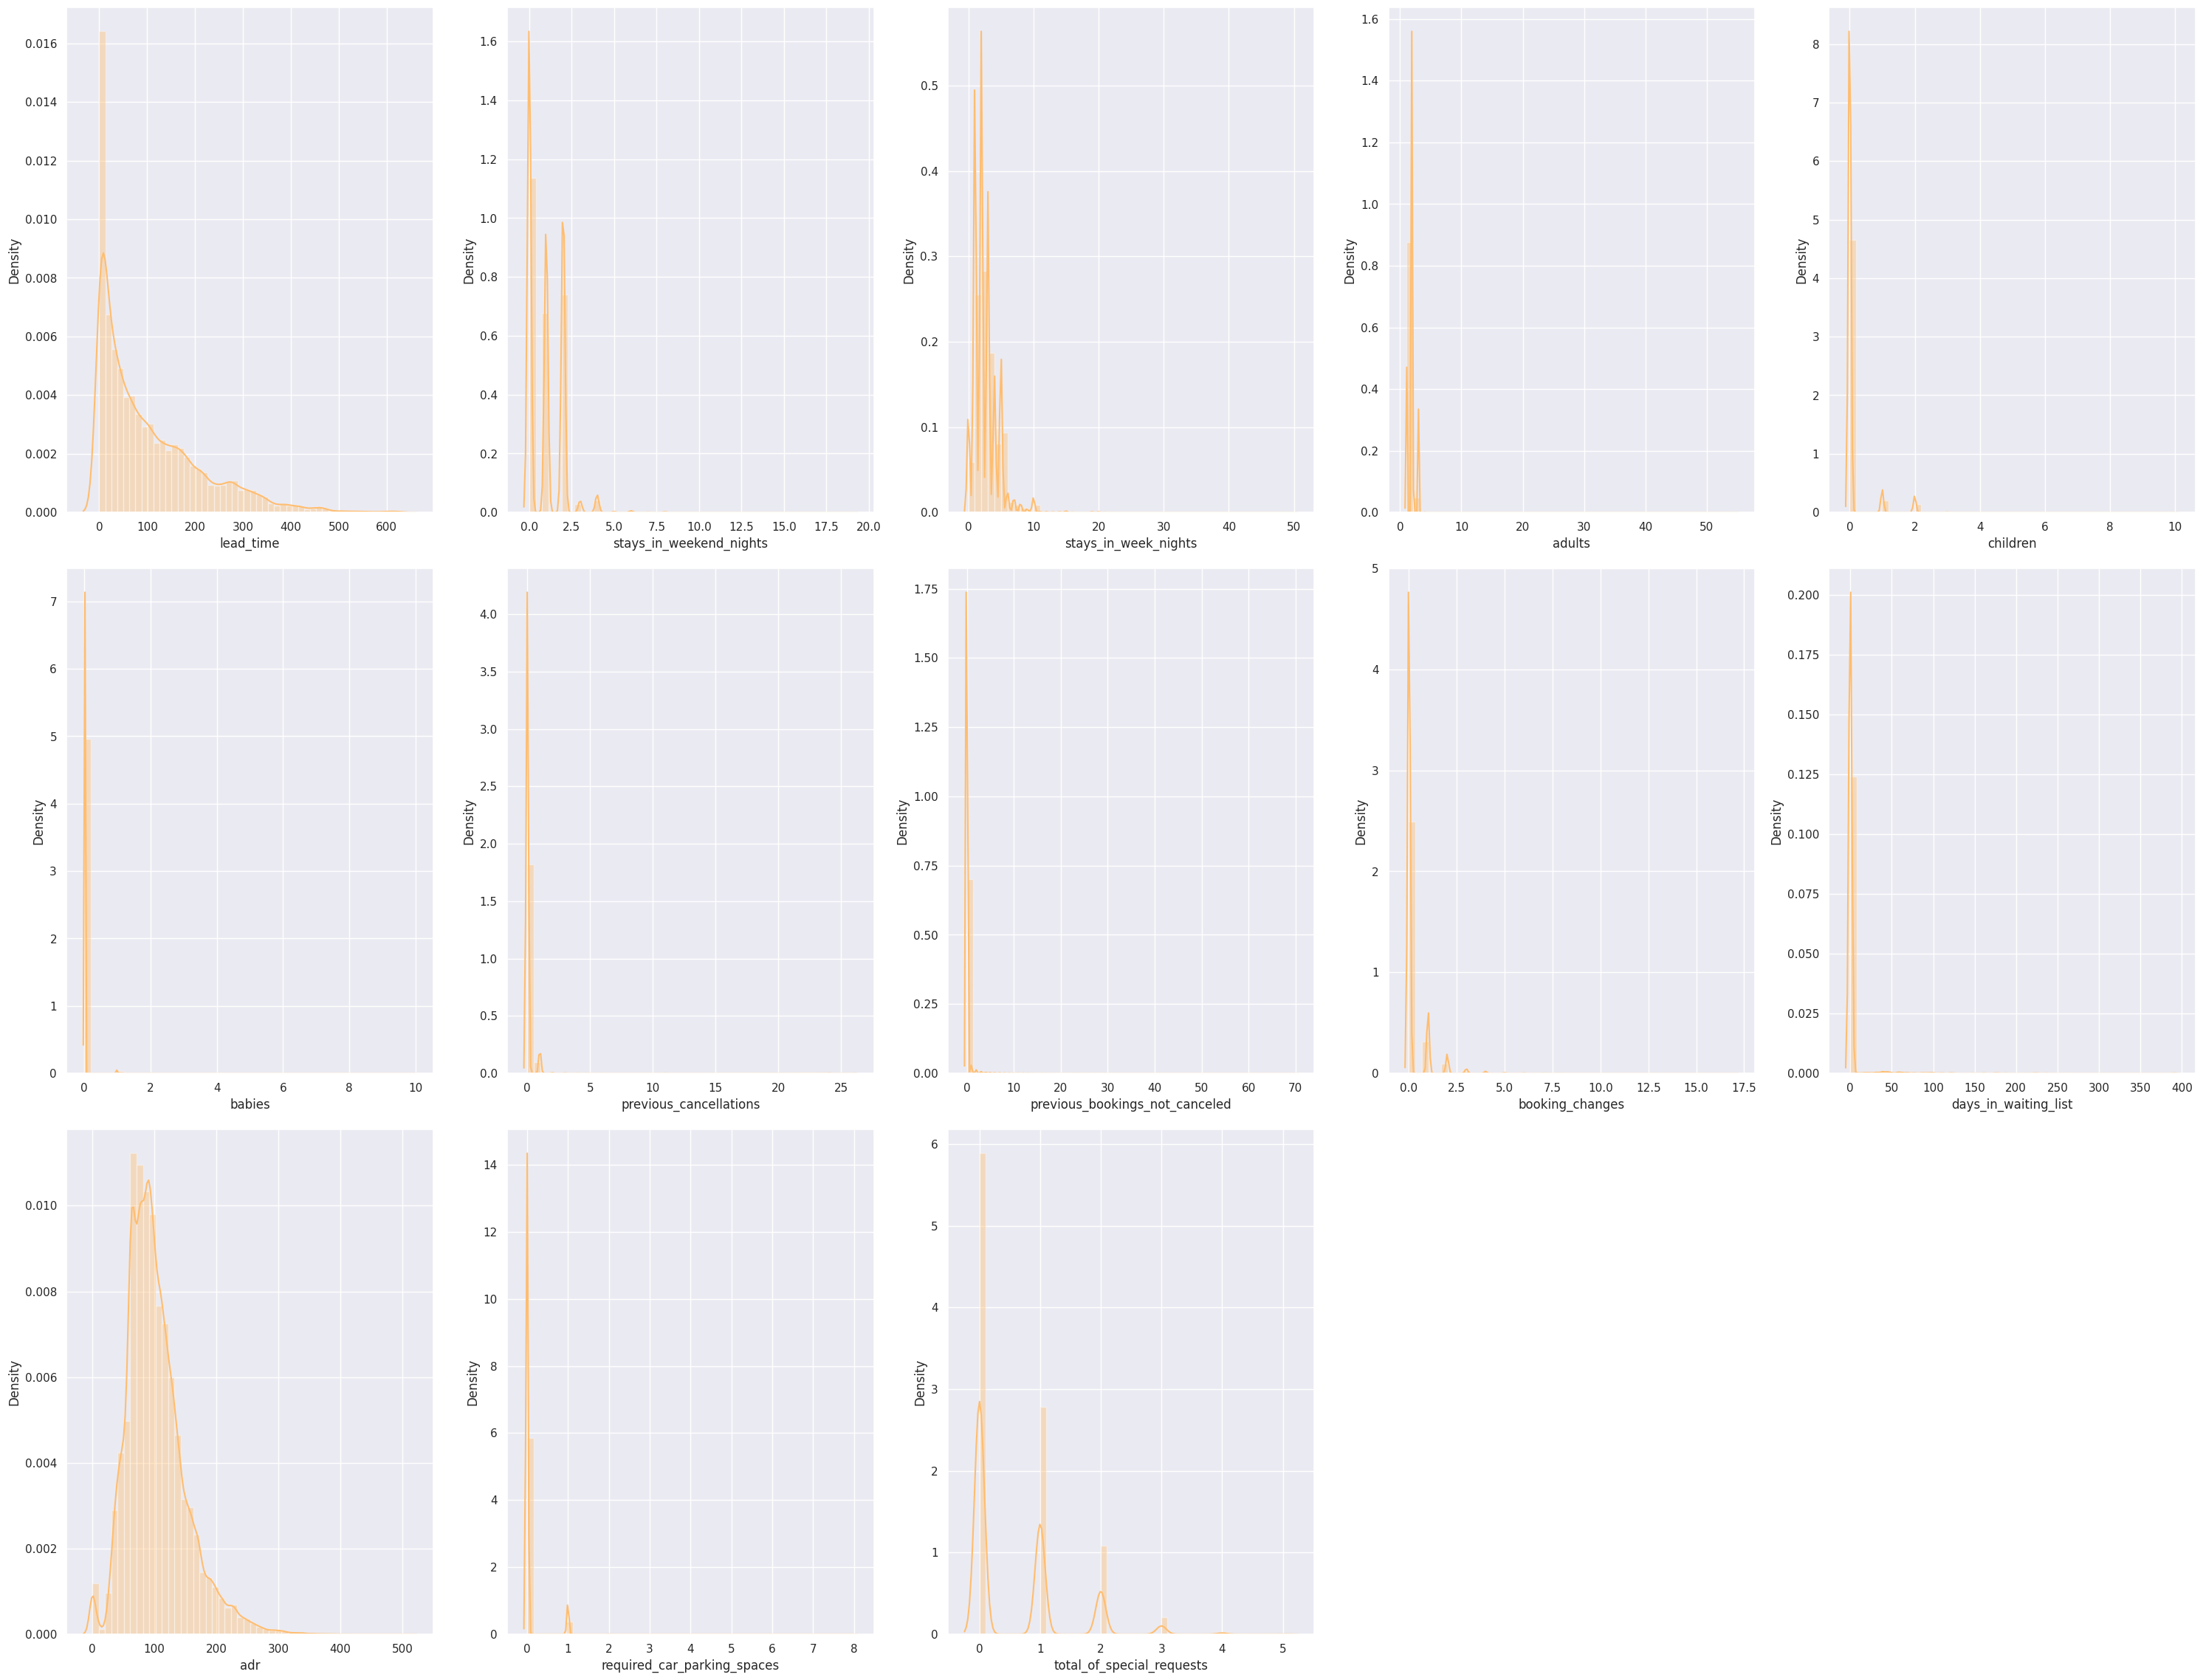

In [ ]:
plt.figure(figsize=(30, 30))
for i in range(0, len(new_nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[new_nums[i]],color = '#FFBD6F')
    plt.tight_layout()


**Bussiness Insight**
1. Melihat dari previous cancellations dan not cancelled, sebagian besar pelanggan adalah pelanggan baru dimana ia tidak pernah cancel dan tidak cancel.
2. Booking changed tidak banyak, artinya orang kebanyakan sudah memiliki kepastian booking.


Selebihnya sudah tercantum saat statistical summary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82721 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82721 non-null  object        
 1   is_canceled                     82721 non-null  int64         
 2   lead_time                       82721 non-null  int64         
 3   arrival_date_year               82721 non-null  int64         
 4   arrival_date_month              82721 non-null  object        
 5   arrival_date_week_number        82721 non-null  int64         
 6   arrival_date_day_of_month       82721 non-null  int64         
 7   stays_in_weekend_nights         82721 non-null  int64         
 8   stays_in_week_nights            82721 non-null  int64         
 9   adults                          82721 non-null  int64         
 10  children                        82721 non-null  int64         
 11  ba

###Visual date

In [ ]:
df.describe(include="datetime").T

,count,unique,top,freq,first,last
reservation_status_date,82561,914,2017-10-21,1021,2017-01-01,2019-09-10


**Bussiness Insight**
1. Pemesanan paling tinggi yaitu pada 21 Oktober 2017 sebanyak 494.

### **Customer Type**

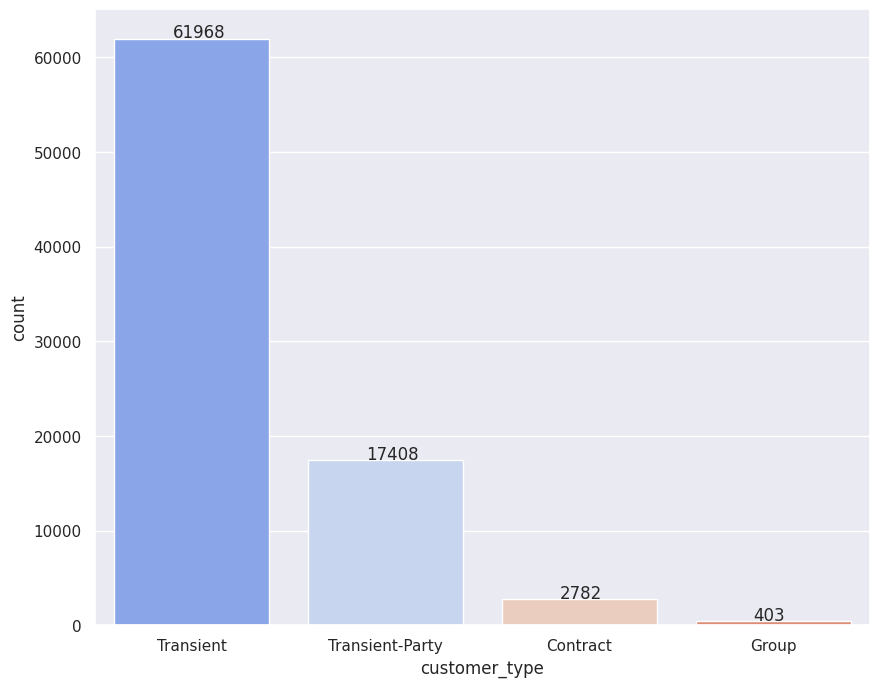

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='customer_type', data=df, palette='coolwarm', order = df['customer_type'].value_counts().index)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.3, patch_height+100))
plt.show()

## EDA deep dive

**Presentase banyak cancel pemesanan hotel per tahun?**


In [ ]:
df_y = df.groupby(['arrival_date_year', 'is_canceled']).size().reset_index()
df_y['percentage'] = df.groupby(['arrival_date_year', 'is_canceled']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_y.columns = ['arrival_date_year', 'is_canceled', 'Counts', 'Percentage']
df_y = df_y.sort_values(by='Counts', ascending=False)
df_y['is_canceled'] = df_y['is_canceled'].map({0 : 'No', 1 : 'Yes'}).astype('str')

fig = px.bar(df_y, x='arrival_date_year', y='Counts',
       color='is_canceled',
       width=800,
       height=550,
       color_discrete_map={
        'Yes': '#94B6D1',
        'No': '#F9BF59',
    },
    text=df_y['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

fig.show()

**Observation:**
Ternyata lebih dari 30% cancel hotel terjadi tiap tahunnya

**kapan bulan yang paling ramai atau sibuk dan pengaruh ke cancel?**

In [ ]:
# Menghitung jumlah kedatangan tamu per bulan
arrival_counts = df.groupby('arrival_date_month')['hotel'].count().reset_index()
arrival_counts.columns = ['arrival_date_month', 'total_arrivals']

# Menghitung jumlah pembatalan per bulan
cancel_counts = df[df['is_canceled'] == 1].groupby('arrival_date_month')['hotel'].count().reset_index()
cancel_counts.columns = ['arrival_date_month', 'total_canceled']

# Menggabungkan data jumlah kedatangan dan pembatalan per bulan
monthly_data = pd.merge(arrival_counts, cancel_counts, on='arrival_date_month', how='left')
monthly_data['total_canceled'] = monthly_data['total_canceled'].fillna(0)

# Menghitung persentase pembatalan
monthly_data['cancel_percentage'] = (monthly_data['total_canceled'] / monthly_data['total_arrivals']) * 100

# Mencari bulan dengan persentase pembatalan tertinggi
busiest_month = monthly_data[monthly_data['cancel_percentage'] == monthly_data['cancel_percentage'].max()]

print("Bulan paling sibuk adalah:", busiest_month['arrival_date_month'].values[0])
print("Persentase pembatalan pada bulan tersebut adalah:", busiest_month['cancel_percentage'].values[0], "%")


Bulan paling sibuk adalah: June
Persentase pembatalan pada bulan tersebut adalah: 41.202672605790646 %


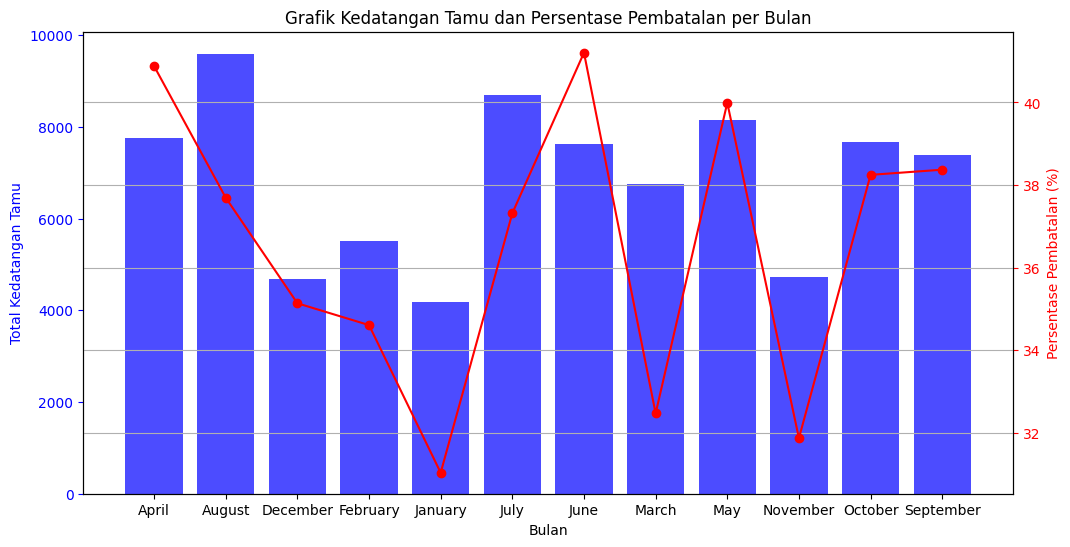

In [ ]:
# Data jumlah kedatangan tamu dan persentase pembatalan per bulan
months = monthly_data['arrival_date_month']
total_arrivals = monthly_data['total_arrivals']
cancel_percentage = monthly_data['cancel_percentage']

# Membuat dua sumbu y untuk kedua data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Sumbu pertama (jumlah kedatangan tamu)
ax1.bar(months, total_arrivals, color='b', alpha=0.7)
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Total Kedatangan Tamu', color='b')
ax1.tick_params('y', colors='b')

# Sumbu kedua (persentase pembatalan)
ax2 = ax1.twinx()
ax2.plot(months, cancel_percentage, color='r', marker='o', label='Persentase Pembatalan')
ax2.set_ylabel('Persentase Pembatalan (%)', color='r')
ax2.tick_params('y', colors='r')

plt.title('Grafik Kedatangan Tamu dan Persentase Pembatalan per Bulan')
plt.grid(True)
plt.show()


**Observation:**
Ternyata paling ramai di bulan agustus

Apakah 'lead_time' berpengaruh terhadap cancel?

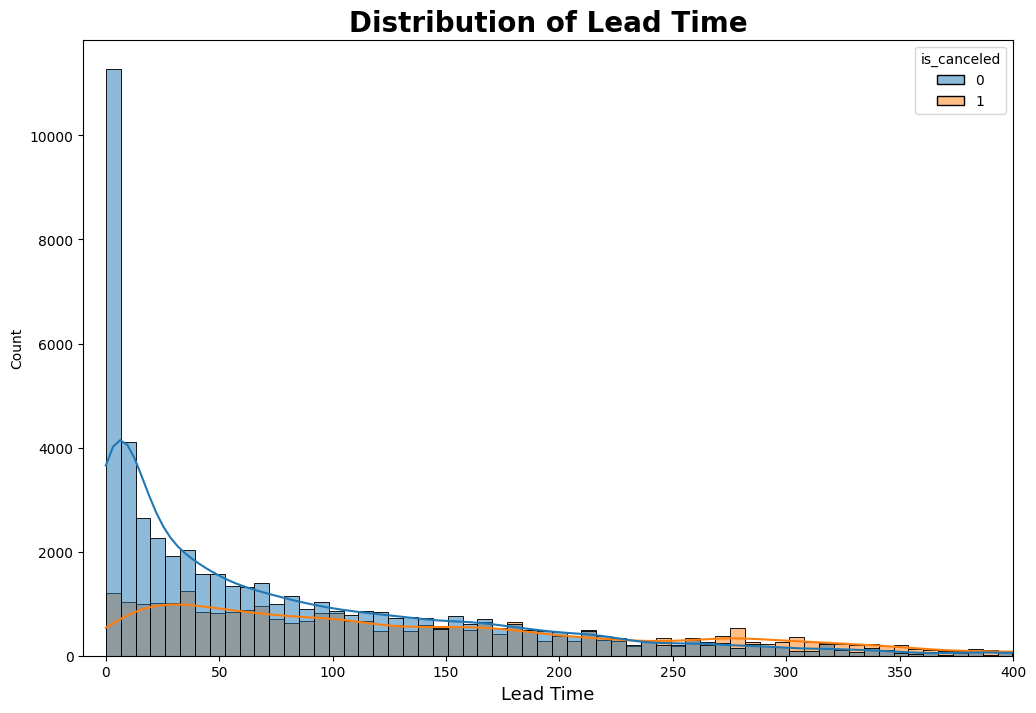

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df,
             x='lead_time',
             hue='is_canceled',
             kde=True,
             ax=ax)

ax.set_title('Distribution of Lead Time', fontsize=20, fontweight='bold')
ax.set_xlabel('Lead Time', fontsize=13, fontweight='normal')
ax.set_xlim(-10, 400)
# ax.set_ylim(-1, 2000)

plt.show(fig)

**Waktu tunggu yang lebih lama kemungkinan pembatalan pemesanan hotel semakin tinggi**

**Bagaimana presentase pengaruh lead_time terhadap cancel?**

In [ ]:
# Group data by lead time
lead_time_groups = df.groupby('lead_time')

# Calculate total cancellations in each lead time group
total_cancellations = lead_time_groups['is_canceled'].sum()

# Calculate total guests in each lead time group
total_guests = lead_time_groups['is_canceled'].count()

# Calculate cancellation percentage for each lead time group
cancellation_percentage = (total_cancellations / total_guests) * 100

# Display the result
cancellation_percentage


lead_time
0        6.996180
1        9.949196
2       10.747331
3        9.797823
4       10.186757
          ...    
608    100.000000
615    100.000000
622    100.000000
626    100.000000
629    100.000000
Name: is_canceled, Length: 475, dtype: float64

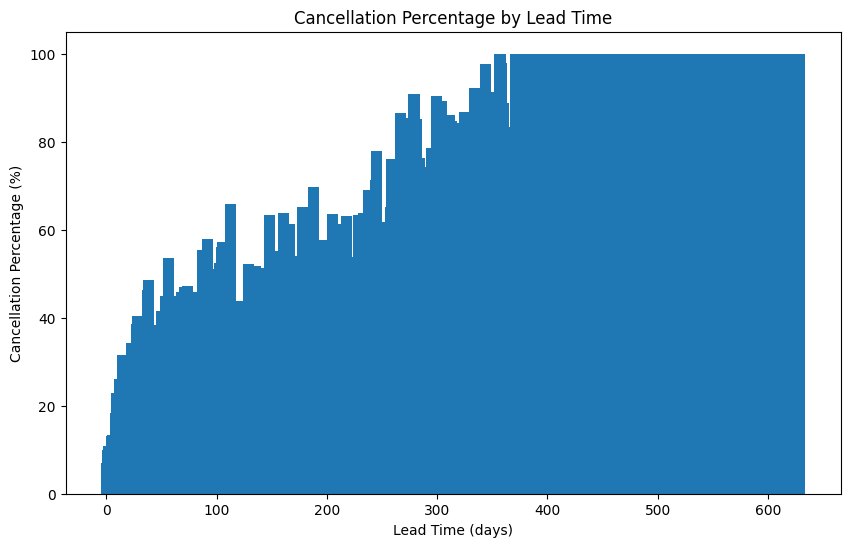

In [ ]:
# Create a bar chart for cancellation percentage
plt.figure(figsize=(10, 6))
plt.bar(cancellation_percentage.index, cancellation_percentage.values, width=10)
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Percentage (%)')
plt.title('Cancellation Percentage by Lead Time')
plt.show()

Semakin besar lead time semakin besar cancel

**apakah orang yang cancel yang bawa anak atau yang tidak bawa anak?**

In [ ]:
# Filter data berdasarkan apakah ada anak atau tidak
with_children = df[df['children'] > 0]
without_children = df[df['children'] == 0]

# Hitung jumlah pembatalan dalam masing-masing kelompok
cancellations_with_children = with_children['is_canceled'].sum()
cancellations_without_children = without_children['is_canceled'].sum()

print("Jumlah pembatalan oleh tamu dengan anak:", cancellations_with_children)
print("Jumlah pembatalan oleh tamu tanpa anak:", cancellations_without_children)


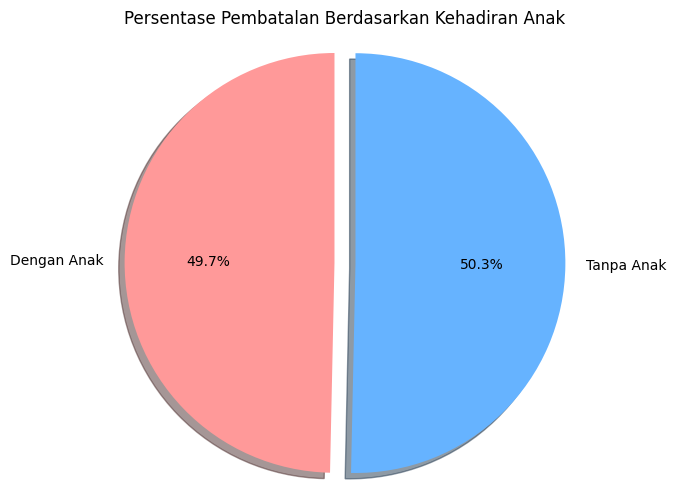

In [ ]:
# Total jumlah data dalam masing-masing kelompok
total_with_children = len(with_children)
total_without_children = len(without_children)

# Persentase pembatalan dalam masing-masing kelompok
percentage_with_children = (cancellations_with_children / total_with_children) * 100
percentage_without_children = (cancellations_without_children / total_without_children) * 100

# Label dan data untuk pie chart
labels = ['Dengan Anak', 'Tanpa Anak']
sizes = [percentage_with_children, percentage_without_children]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # Pecahkan bagian "Dengan Anak"

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Memastikan lingkaran berbentuk lingkaran

plt.title("Persentase Pembatalan Berdasarkan Kehadiran Anak")
plt.show()


Ternyata dengan atau tanpa anak rasio pembatalannya hampir sama

**booking changed apakah pengaruh ke cancel?**

In [ ]:
df['booking_changes'].unique()

array([ 0,  1,  2,  3,  4,  5,  8,  6, 10,  7, 16, 13,  9, 15, 14, 12, 17,
       11])

<Figure size 1000x600 with 0 Axes>

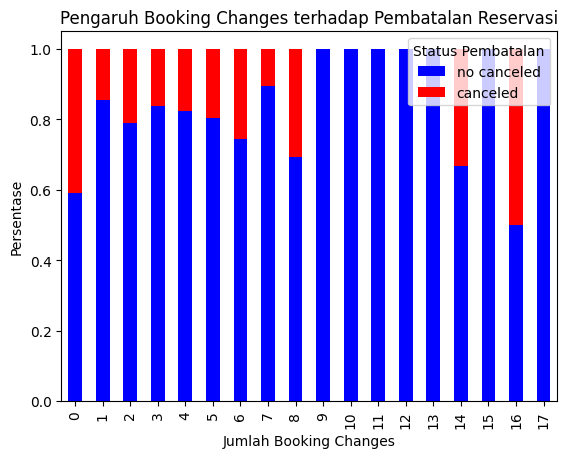

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data berdasarkan jumlah perubahan booking
booking_changes_data = df.groupby('booking_changes')['is_canceled'].value_counts(normalize=True).unstack().fillna(0)

# Buat bar plot
plt.figure(figsize=(10, 6))
booking_changes_data.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.xlabel('Jumlah Booking Changes')
plt.ylabel('Persentase')
plt.title('Pengaruh Booking Changes terhadap Pembatalan Reservasi')
plt.legend(title='Status Pembatalan', labels=['no canceled', 'canceled'])

plt.show()


pengaruh jumlah perubahan booking terhadap pembatalan reservasi. bervariasi, jumlah tidak cancel terbanyak saat jumlah booking changes 9-13

In [ ]:
df[df['reserved_room_type']!=df['assigned_room_type']]['is_canceled'].value_counts()

0    9503
1     560
Name: is_canceled, dtype: int64

In [ ]:
df[df['reserved_room_type']==df['assigned_room_type']]['is_canceled'].value_counts()

0    42452
1    30186
Name: is_canceled, dtype: int64

Jika reserved_room_type != assigned_room_type cancelnya lebih sedikit di bandingkan sebaliknya

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82721 entries, 0 to 83292
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82721 non-null  object        
 1   is_canceled                     82721 non-null  int64         
 2   lead_time                       82721 non-null  int64         
 3   arrival_date_year               82721 non-null  int64         
 4   arrival_date_month              82721 non-null  object        
 5   arrival_date_week_number        82721 non-null  int64         
 6   arrival_date_day_of_month       82721 non-null  int64         
 7   stays_in_weekend_nights         82721 non-null  int64         
 8   stays_in_week_nights            82721 non-null  int64         
 9   adults                          82721 non-null  int64         
 10  children                        82721 non-null  int64         
 11  ba

## **Categorical Features**
mencari kemungkinan nilai Undefined adalah missing value dari fitur categorical

**meal**

In [ ]:
df['meal'].unique()

array(['BB', 'HB', 'SC', 'FB', 'Undefined'], dtype=object)

In [ ]:
# menghitung jumlah nilai 'undefined' dalam kolom 'meal'
jumlah_undefined_meal = (df['meal'] == 'Undefined').sum()

# Jumlah nilai 'undefined' akan disimpan dalam variabel jumlah_undefined_meal
print("Jumlah 'undefined' dalam kolom 'meal':", jumlah_undefined_meal)


Jumlah 'undefined' dalam kolom 'meal': 821


**Karena tidak diketahui maka dilakukan pengisian dengan menggunakan nilai yang paling sering muncul.**

In [ ]:
# menemukan modus pada meal
modus_meal = df['meal'].mode()[0]

# Ganti nilai 'Undefined' dengan modus
df['meal'] = df['meal'].replace({'Undefined': modus_meal})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82721 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82721 non-null  object 
 1   is_canceled                     82721 non-null  int64  
 2   lead_time                       82721 non-null  int64  
 3   arrival_date_year               82721 non-null  int64  
 4   arrival_date_month              82721 non-null  object 
 5   arrival_date_week_number        82721 non-null  int64  
 6   arrival_date_day_of_month       82721 non-null  int64  
 7   stays_in_weekend_nights         82721 non-null  int64  
 8   stays_in_week_nights            82721 non-null  int64  
 9   adults                          82721 non-null  int64  
 10  children                        82721 non-null  int64  
 11  babies                          82721 non-null  int64  
 12  meal                            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,No Deposit,314,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,Non Refund,1,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,Non Refund,12,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,No Deposit,87,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,No Deposit,16,0,Transient,57.92,0,1,Canceled,2017-08-24,5


## Feature Engineering

Label Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82721 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82721 non-null  object 
 1   is_canceled                     82721 non-null  int64  
 2   lead_time                       82721 non-null  int64  
 3   arrival_date_year               82721 non-null  int64  
 4   arrival_date_month              82721 non-null  object 
 5   arrival_date_week_number        82721 non-null  int64  
 6   arrival_date_day_of_month       82721 non-null  int64  
 7   stays_in_weekend_nights         82721 non-null  int64  
 8   stays_in_week_nights            82721 non-null  int64  
 9   adults                          82721 non-null  int64  
 10  children                        82721 non-null  int64  
 11  babies                          82721 non-null  int64  
 12  meal                            

In [ ]:
# Ecndoding categorical feature // Label Encoder
df['meal'] = df['meal'].map({'SC': 0, 'BB': 1,'HB': 2,'FB': 3}).astype('int')
df['reserved_room_type'] = df['reserved_room_type'].map({'A': 0, 'B': 1, 'C': 2,'D': 3,'E': 4, 'F': 5, 'G': 6, 'H': 7, 'L': 8}).astype('int')
df['deposit_type'] = df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1,'Non Refund': 2}).astype('int')
df['customer_type'] = df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,...,0,0,314,0,0,38.40,0,0,Check-Out,2019-01-14
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,...,0,2,1,0,0,62.80,0,0,Canceled,2017-10-21
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,...,0,2,12,0,0,110.00,0,0,Canceled,2018-11-25
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,...,0,0,9,0,0,45.00,0,0,Check-Out,2018-10-18
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,...,0,0,16,0,0,57.92,0,1,Canceled,2017-08-24


Mengganti fitur booking_change 0 dan 1 saja. 0 untuk nilai 0 dan 1 untuk selain 0

In [ ]:
# Mengganti fitur 'booking_changes' menjadi 0 untuk nilai 0 dan 1 untuk nilai selain 0
df['booking_changes'] = df['booking_changes'].apply(lambda x: 0 if x == 0 else 1)


In [ ]:
bc = df['booking_changes']

In [ ]:
print(bc)

0        0
1        0
2        0
3        0
4        0
        ..
16656    0
16657    0
16658    0
16659    0
16660    1
Name: booking_changes, Length: 16540, dtype: int64


In [ ]:
temp = ['market_segment','distribution_channel']
for column in df[temp]:
    print(f"============= {column} =================")
    print(df[column].unique())
    print()

============= market_segment =================
['Online TA' 'Groups' 'Corporate' 'Offline TA/TO' 'Direct' 'Complementary'
 'Aviation' 'Undefined']

============= distribution_channel =================
['TA/TO' 'Corporate' 'Direct' 'GDS' 'Undefined']



In [ ]:
df[(df['market_segment'] == 'Undefined')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
6592,"Renaissance Hamburg Hotel Hamburg, Germany",1,1,2017,August,32,5,0,2,3,...,B,0,0,9,0,2,18.0,0,2,2017-08-04


In [ ]:
df[(df['distribution_channel'] == 'Undefined')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
6592,"Renaissance Hamburg Hotel Hamburg, Germany",1,1,2017,August,32,5,0,2,3,...,B,0,0,9,0,2,18.0,0,2,2017-08-04
24197,Protea Hotel Fire & Ice! by Marriott Johannesb...,1,8,2017,August,33,13,2,5,2,...,B,0,0,9,0,2,76.5,0,1,2017-08-09
59800,Renaissance Santo Domingo Jaragua Hotel & Casi...,0,103,2017,July,28,5,2,3,2,...,A,0,0,9,0,0,112.7,1,2,2017-07-10
75373,"Colony Club, Barbados Barbados",1,1,2017,August,32,5,0,2,2,...,B,0,0,14,0,2,12.0,0,1,2017-08-04


**observation:** Karena undefined bisa di katakan orang yang langsung booking (direct) dilihat dari days_in_waiting_list = 0

In [ ]:
# Mengganti 'undefined' menjadi 'direct' dalam kolom 'market_segment'
df['market_segment'] = df['market_segment'].replace('undefined', 'direct')

# Mengganti 'undefined' menjadi 'direct' dalam kolom 'distribution_channel'
df['distribution_channel'] = df['distribution_channel'].replace('undefined', 'direct')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82721 entries, 0 to 83292
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82721 non-null  object        
 1   is_canceled                     82721 non-null  int64         
 2   lead_time                       82721 non-null  int64         
 3   arrival_date_year               82721 non-null  int64         
 4   arrival_date_month              82721 non-null  object        
 5   arrival_date_week_number        82721 non-null  int64         
 6   arrival_date_day_of_month       82721 non-null  int64         
 7   stays_in_weekend_nights         82721 non-null  int64         
 8   stays_in_week_nights            82721 non-null  int64         
 9   adults                          82721 non-null  int64         
 10  children                        82721 non-null  int64         
 11  ba

## Outliers

In [ ]:
#Membagi kolom yang numerical, categorical dan datetime
nums = [] #numerical
cats = [] #categorical
date = [] #datetime

for col in df.columns:
    if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64'):
        nums.append(col)
    elif (df[col].dtypes == 'datetime64[ns]'):
        date.append(col)
    else:
        cats.append(col)

ValueError: ignored

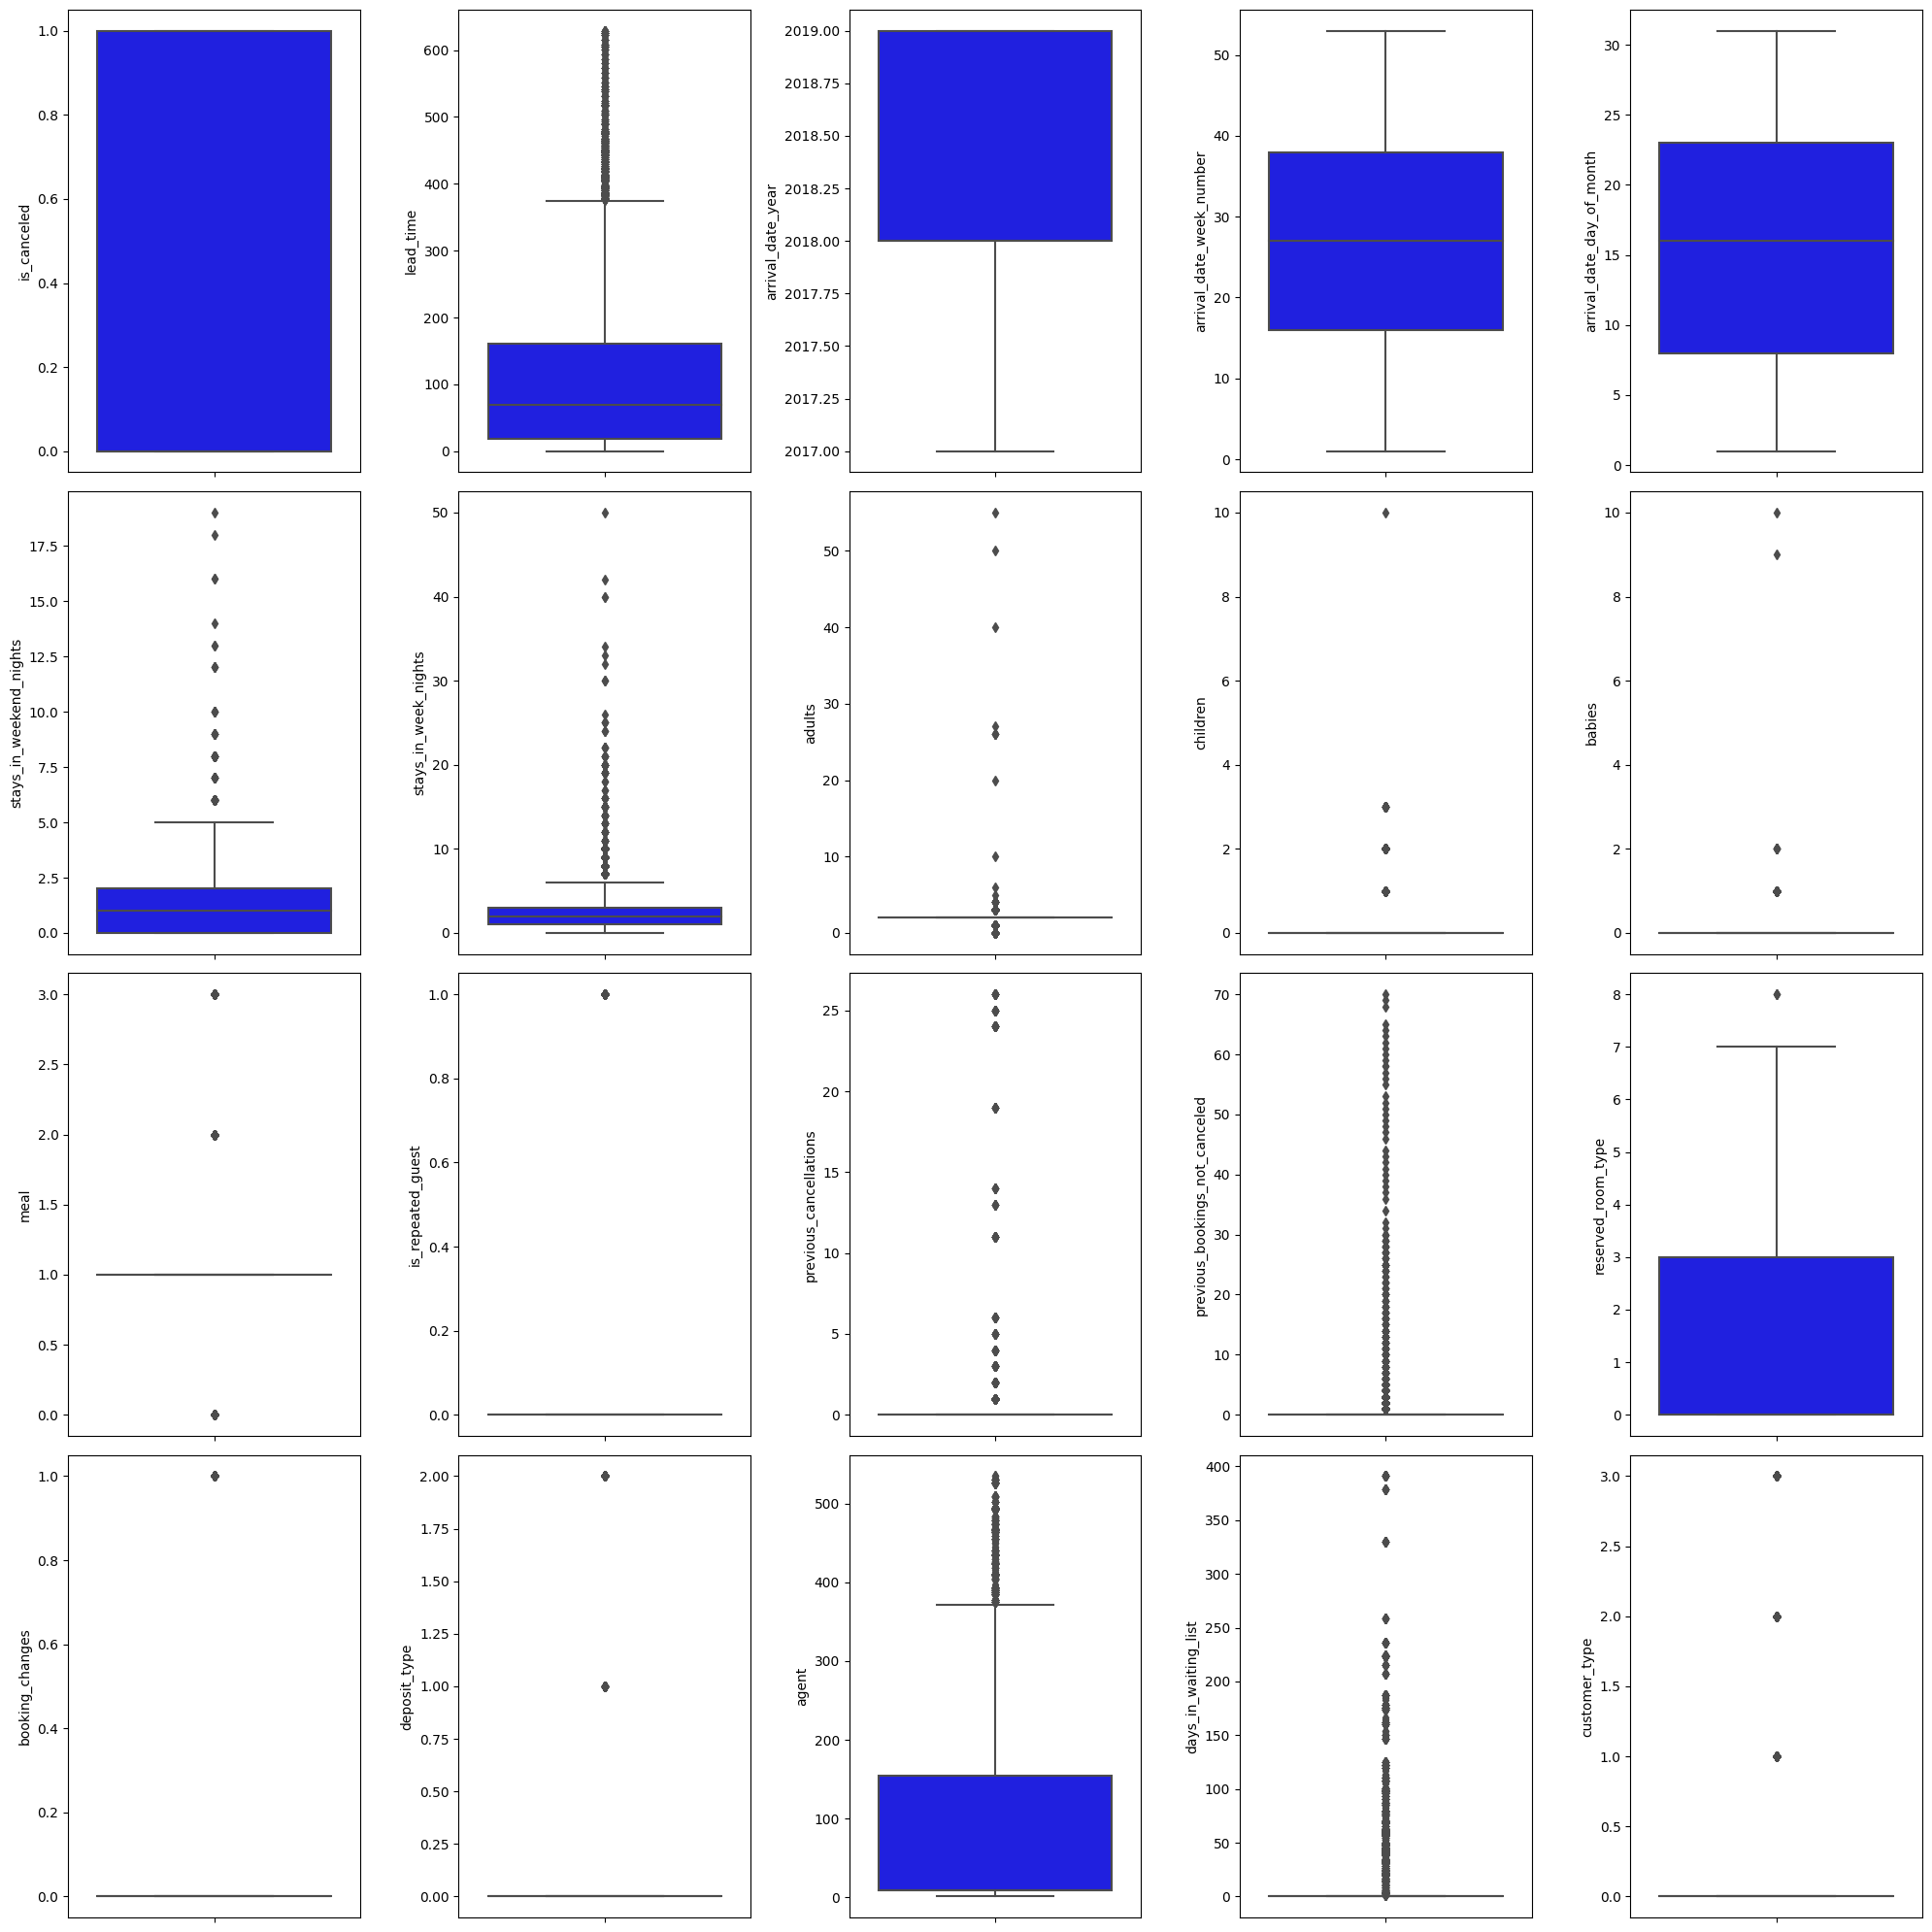

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(y=nums[i],data=df,color='blue')
    plt.tight_layout()


**Observation** :

Terdapat banyak outliers. Tetapi berdasarkan peruntukkan kolomnya, beberapa kolom dianggap wajar memiliki outliers tersebut, kecuali :

- `adults` sama dengan '50'
- 'children' sama dengan '10'
- 'babies' = 10

Ketika fitur tersebut perlu di cek ke-sah-an datanya.

In [ ]:
df[df['adults']>4]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
4242,"Las Vegas Marriott Las Vegas, NV",1,336,2017,September,37,7,1,2,50,...,A,0,0,9,0,3,0.0,0.0,0.0,2017-01-18
12668,"Indianapolis Airport Courtyard Indianapolis, IN",1,334,2017,October,42,12,2,5,10,...,E,0,0,9,0,3,0.0,0.0,0.0,2017-01-02


**Observation:** Ada keanehan bahwa adults > 4 bahkan sampai puluhan maka dilakukan pengecekan.

In [ ]:
#Berikut data adults yang = 50 outlier
df[df['adults']==50]['reserved_room_type'].value_counts()

A    1
Name: reserved_room_type, dtype: int64

Cek tipe kamar yang nilai adultsnya 50

In [ ]:
df[(df['hotel']=='Las Vegas Marriott Las Vegas, NV ')&(df['reserved_room_type']=='A')]['adults'].value_counts()

Series([], Name: adults, dtype: int64)

cek modus tipe kamar A

In [ ]:
# Mengubah nilai 'adults' menjadi 2 pada baris dengan nama hotel 'Las Vegas Marriott Las Vegas, NV' dan 'adults' == 50
df.loc[(df['hotel'] == 'Las Vegas Marriott Las Vegas, NV') & (df['adults'] == 50), 'adults'] = 2


Mengubah nilai 'adults' menjadi 2 pada baris dengan nama hotel 'Las Vegas Marriott Las Vegas, NV' dan 'adults' == 50



In [ ]:
#Berikut data adults yang = 50 outlier
df[df['adults']==10]['reserved_room_type'].value_counts()

4    1
Name: reserved_room_type, dtype: int64

In [ ]:
df[(df['hotel']=='Indianapolis Airport Courtyard Indianapolis, IN')&(df['reserved_room_type']=='E')]['adults'].value_counts()

Series([], Name: adults, dtype: int64)

In [ ]:
df.loc[(df['hotel'] == 'Indianapolis Airport Courtyard Indianapolis, IN') & (df['adults'] == 50), 'adults'] = 2

Mengubah nilai 'adults' menjadi 2 pada baris dengan nama hotel 'Indianapolis Airport Courtyard Indianapolis, IN' dan 'adults' == 10



In [ ]:
# Menghitung modus 'adults' untuk setiap kombinasi hotel dan reserved_room_type
modus_adults = df.groupby(['hotel', 'reserved_room_type'])['adults'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Mengganti nilai 'adults' yang lebih besar dari 4 berdasarkan modus
for index, row in modus_adults.iterrows():
    hotel = row['hotel']
    reserved_room_type = row['reserved_room_type']
    mode_adults = row['adults']

    # Mengganti nilai 'adults' yang lebih besar dari 4
    df.loc[(df['hotel'] == hotel) & (df['reserved_room_type'] == reserved_room_type) & (df['adults'] > 4), 'adults'] = mode_adults


Dilakukan handling outlire untuk setiap adults > 4 diganti dengan modus tiap hotelnya

In [ ]:
df[df['adults']>4]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Encoding categorical

In [ ]:
# Changing the Categorical Values to Numerical values using the sklearns Label Encoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,14,0,8,2019,4,2,10,0,4,2,...,0,0,0,314,0,0,38.40,0,0,2019-01-14
1,18,1,524,2018,2,51,15,0,2,2,...,0,0,2,1,0,0,62.80,0,0,2017-10-21
2,56,1,175,2019,8,20,19,1,2,2,...,0,0,2,12,0,0,110.00,0,0,2018-11-25
3,10,0,0,2018,10,43,17,1,0,1,...,0,0,0,9,0,0,45.00,0,0,2018-10-18
4,62,1,33,2017,11,39,26,2,3,2,...,0,0,0,16,0,0,57.92,0,1,2017-08-24


In [ ]:
df['reservation_status_date'] = df['reservation_status_date'].astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82721 entries, 0 to 83292
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82721 non-null  int64  
 1   is_canceled                     82721 non-null  int64  
 2   lead_time                       82721 non-null  int64  
 3   arrival_date_year               82721 non-null  int64  
 4   arrival_date_month              82721 non-null  int64  
 5   arrival_date_week_number        82721 non-null  int64  
 6   arrival_date_day_of_month       82721 non-null  int64  
 7   stays_in_weekend_nights         82721 non-null  int64  
 8   stays_in_week_nights            82721 non-null  int64  
 9   adults                          82721 non-null  int64  
 10  children                        82721 non-null  int64  
 11  babies                          82721 non-null  int64  
 12  meal                            

# Model Implementation

## Split Data

In [ ]:

features_ = df.drop(columns = ['is_canceled'])
target = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(features_, target, test_size = 0.2,random_state = 0, stratify=target)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (66176, 29)
Test data set size :  (16545, 29)


In [ ]:
y_train.isnull().sum()


0

## Modelling

In [ ]:
cly_sblm = [DecisionTreeClassifier(),
            LogisticRegression(C = 0.5, max_iter = 500),
            GaussianNB(),
            SVC(kernel = 'rbf', max_iter = 1000, probability = True),
            RandomForestClassifier(),
            XGBClassifier(random_state=42)]

df_n = pd.DataFrame(columns = ['Method', 'Recall','Precision', 'F1 Score','AUC','Accuracy'])
df_n

,Method,Recall,Precision,F1 Score,AUC,Accuracy


## Evaluation Score

In [ ]:
for model in cly_sblm:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    method = str(type(model)).split('.')[-1][:-2]

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)


    df_n = df_n.append({'Method': method,
                    'Recall': recall,
                    'Precision': precision,
                    'F1 Score': f1,
                    'AUC':auc,
                     'Accuracy': acc},
                     ignore_index=True)

In [ ]:
df_n

,Method,Recall,Precision,F1 Score,AUC,Accuracy
0,DecisionTreeClassifier,0.895285,0.894848,0.895066,0.916522,0.921970
1,LogisticRegression,0.000000,0.000000,0.000000,0.500000,0.628286
2,GaussianNB,0.128293,0.646721,0.214111,0.543415,0.649924
3,SVC,0.599837,0.414961,0.490559,0.549750,0.536899
4,RandomForestClassifier,0.867967,0.958693,0.911077,0.922921,0.937020
5,XGBClassifier,0.929756,0.993398,0.960524,0.963050,0.971593


# Model Implementation  but Hypertuning

## Hypertuning using Random search CV

In [ ]:
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for all models
param_grid = {
    'RandomForestClassifier': {
        'n_estimators': [10, 20, 30, 40, 50],
        'max_depth': [1, 2, 3, 4, 5],
    },

    'XGBoost': {
    'n_estimators': [10,20,30,40,50],
    'max_depth':[1,2,3,4,5],

    },

    'DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'LogisticRegression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'max_iter': [100, 500, 1000],
    },
    'GaussianNB': {
        'priors': [
            [0.7, 0.3],
            [0.8, 0.2],
            [0.6, 0.4],
        ]
    },
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'class_weight': ['balanced', None],
    }
}

# Create an empty dictionary to store the best estimators
best_estimators = {}


# Loop through each model and perform RandomizedSearchCV
for model_name, param_values in param_grid.items():
    if model_name == 'RandomForestClassifier':
        clf = RandomForestClassifier(random_state=42)
    elif model_name == 'XGBoost':
        clf = XGBClassifier(random_state=42)
    elif model_name == 'DecisionTreeClassifier':
        clf = DecisionTreeClassifier()
    elif model_name == 'LogisticRegression':
        clf = LogisticRegression(C = 0.5, max_iter = 500)
    elif model_name == 'GaussianNB':
        clf = GaussianNB()
    elif model_name == 'SVC':
        clf = SVC(kernel = 'rbf', max_iter = 1000, probability = True)

    random_cv = RandomizedSearchCV(clf, param_values, cv=5, scoring='recall', n_iter=10)
    random_cv.fit(X_train, y_train)
    best_estimators[model_name] = random_cv.best_estimator_




## Evaluating Score

In [ ]:
models = ['RandomForestClassifier', 'LogisticRegression','XGBoost',
          'DecisionTreeClassifier','GaussianNB', 'SVC' ]

eval_df = pd.DataFrame(columns=['Model', 'Recall Train', 'Recall Test',
                                'Precision Train', 'Precision Test',
                                'F1 Score Train', 'F1 Score Test',
                                'AUC Train', 'AUC Test' ])
for i in models:
  best_model = best_estimators[i]
  y_pred_train = best_model.predict(X_train)
  y_pred_test = best_model.predict(X_test)

  recall_train = recall_score(y_train, y_pred_train)
  recall_test = recall_score(y_test, y_pred_test)

  precision_train =  precision_score(y_train, y_pred_train)
  precision_test =  precision_score(y_test, y_pred_test)

  F1_train =  f1_score(y_train, y_pred_train)
  F1_test =  f1_score(y_test, y_pred_test)

  AUC_train = roc_auc_score(y_train, y_pred_train)
  AUC_test = roc_auc_score(y_test, y_pred_test)


  eval_df = eval_df.append({'Model':i, 'Recall Train':recall_train, 'Recall Test':recall_test,
                            'Precision Train':precision_train, 'Precision Test': precision_test,
                           'F1 Score Train': F1_train, 'F1 Score Test':F1_test,
                            'AUC Train':AUC_train, 'AUC Test':AUC_test}, ignore_index=True)

eval_df

,Model,Recall Train,Recall Test,Precision Train,Precision Test,F1 Score Train,F1 Score Test,AUC Train,AUC Test
0,RandomForestClassifier,0.433224,0.417398,0.967496,0.968314,0.598467,0.583343,0.712307,0.704659
1,LogisticRegression,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
2,XGBoost,0.878440,0.867805,0.980621,0.978907,0.926723,0.920014,0.934085,0.928371
3,DecisionTreeClassifier,0.917063,0.816585,0.956900,0.852776,0.936558,0.834289,0.946314,0.866590
4,GaussianNB,0.201447,0.205366,0.481068,0.491058,0.283979,0.289612,0.536448,0.539720
5,SVC,1.000000,1.000000,0.371691,0.371714,0.541945,0.541970,0.500000,0.500000


In [ ]:
f1 = f1_score(y_test, preds)
print("F1-Score:", f1)


F1-Score: 0.9605241054930287


F1-Score mengukur keseimbangan antara presisi dan recall, sehingga jika salah satu metrik lebih rendah, F1-Score juga akan lebih rendah

In [ ]:
conf_matrix = confusion_matrix(y_test, preds)
false_negatives = conf_matrix[1][0]  # FN terdapat pada baris 1 dan kolom 0
print("False Negatives:", false_negatives)


False Negatives: 432


menunjukkan berapa banyak kasus positif sebenarnya yang salah diklasifikasikan sebagai negatif oleh model Anda.

Dapat menghitung F1-Score dan melihat jumlah False Negatives pada model klasifikasi Anda. Ini membantu Anda memahami sejauh mana model Anda dalam mengidentifikasi kasus positif dan apakah model Anda memiliki kecenderungan untuk melewatkan kasus-kasus positif (False Negatives).

# Feature importance

In [ ]:
# Plotting the feature importances using the Boosted Gradient Descent setelah tren model terbaik
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:

# Training the model
model = XGBClassifier()
model_importance = model.fit(X_train, y_train)




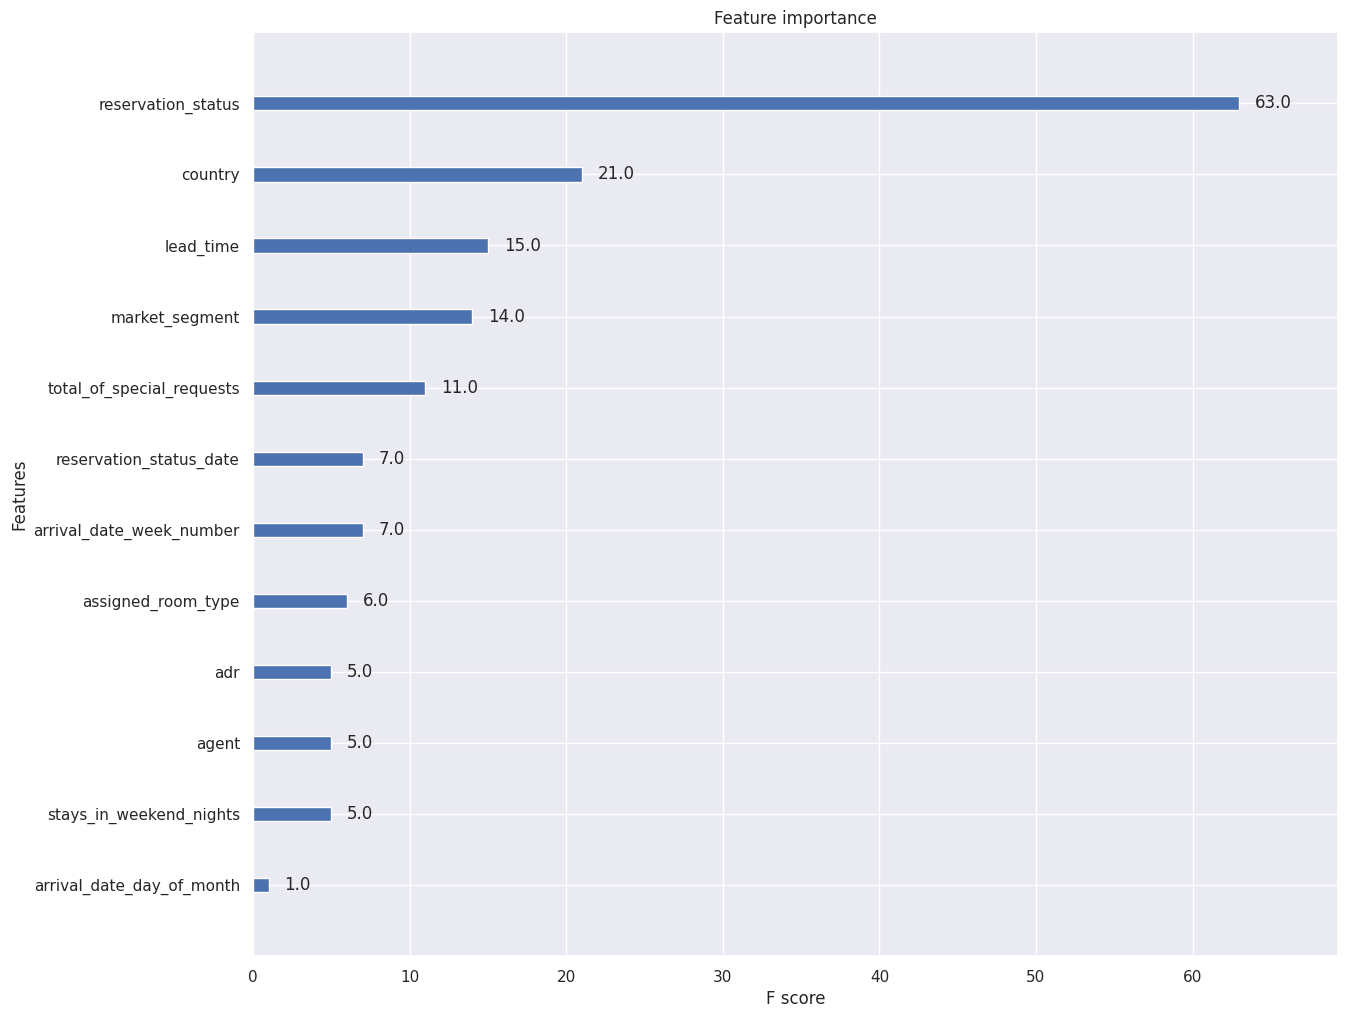

In [ ]:
# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
sns.set(style = 'darkgrid')
plot_importance(model_importance);